In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

9.8: Steepest Descent Method in l-infinity norm. (pg. 529)  
A7.12: Cox Proportional Hazards Model. (pg. 100)  
A8.16: Fitting a Sphere to Data. (pg. 139)  
A8.26: Some Problems Involving a Polyhedron and a Point. (pg. 144)  
A9.10: True or False. (No justification required) (pg. )  
A9.13: Newton's Method in Machine Learning Problems.  
A13.2: T/F (Flop Counts). (No justification required)  
A13.3: Ridge Regression.   
A17.16: Efficient Solution of Basic Portfolio Optimization Problem.

### 9.8) Steepest Descent Method in l-infinity norm
*Explain how to find a steepest descent direction in the $\ell_{\infty}$-norm, and give a simple interpretation.*

We can find a steepest descent direction in the $\ell_{\infty}$-norm by unit direction vector of the element of the gradient with the largest magnitude. This means we will travel in straightline paths with orthogonal turns.

### A7.12) Cox Proportional Hazards Model

Since $S(t) = prob(T\geq t)$, we can interpret the CDF as $F_T(t) = 1 - S(t)$. Thus the PDF is $f_T(t) = - S'(t) = S(t) \lambda(t)$, by taking the derivative of the CDF and then applying the given hazard rate relation. 

We seek to maximize the log likelihood $$\exp(-\int_0^t \lambda(\tau) d\tau) + \log\lambda_0(t) + w^Tx$$
$$ = \int_0^t \lambda_0(\tau) \exp(w^Tx)d\tau + \log\lambda_0(t) + w^Tx$$
$$ = -\exp(w^Tx) \int_0^t \lambda_0(\tau) d\tau + \log\lambda_0(t) + w^Tx$$

The negative exponential and affine terms are convex, so this is a convex optimization problem over the variable w.

### A8.16) Fitting a Sphere to Data

Let us consider the substitution $t = r^2 - ||c||_2^2$. Thus we minimize
$$ \Sigma_{i=1}^{m} (||u_i-c||^2 - t - ||c||_{2}^{2})^2 $$
$$ = \Sigma_{i=1}^{m} ((u_i - c)^T(u_i - c) - t - c^Tc)^2 $$
$$ = \Sigma_{i=1}^{m} (u^Tu - 2c^Tu - t)^2 $$
over the variables c and t, which is a convex optimization problem. From the solution $c^*$ and $t^*$, we can recover $r^* = \sqrt{t^* + ||c^*||_2^2}$

In [19]:
n = 2
m = 50
U = np.array([[1.824183228637652032e+00, 1.349093690455489103e+00, 6.966316403935147727e-01, 7.599387854623529392e-01, 2.388321695850912363e+00, 8.651370608981923116e-01, 1.863922545015865406e+00, 7.099743941474848663e-01, 6.005484882320809570e-01, 4.561429569892232472e-01, 5.328296545713475663e-01, 2.138547819234526415e+00, 1.906676474276197464e+00, 1.015547309536922516e+00, 8.765948388006337133e-01, 1.648147347399247842e+00, 1.027902202451572045e+00, 2.145586297520478691e+00, 1.793440421753045744e+00, 1.020535583041398908e+00, 8.977911075271942654e-01, 1.530480229262339398e+00, 2.478088034137528872e-01, 2.617415807793897820e+00, 2.081978553098443374e+00, 1.891226687205936452e+00, 8.222497927065576251e-01, 5.803514604868882376e-01, 1.158670193449639063e+00, 6.016685032455900695e-01, 5.605410828151705660e-01, 2.508815467550573164e+00, 2.230201413385580977e+00, 1.170848897912992514e+00, 2.256355929901105561e+00, 6.686991510936428629e-01, 2.040269595792217672e+00, 3.634166812924328749e-01, 5.418647611079159265e-01, 6.631470058399455692e-01, 4.286142597532469622e-01, 2.155925078996823618e+00, 2.379380016960549682e+00, 6.343212414048013947e-01, 1.469076407947448981e+00, 1.225322035289937439e+00, 1.467602887401966871e+00, 9.345319187253748883e-01, 1.985592768641736505e+00, 2.106896115090134636e+00],
[-9.644136284187876385e-01, 1.069547315003422927e+00, 6.733229334437943470e-01, 7.788072961810316164e-01, -9.467465278344706636e-01, -8.591303443863639311e-01, 1.279527420871080956e+00, 5.314829019311283487e-01, 6.975676079749143499e-02, -4.641873429414754559e-01, -2.094571396598311763e-01, -8.003479827938377866e-01, 6.135280782546607137e-01, -9.961307468791747999e-01, -8.765215480412106297e-01, 9.655406812422813179e-01, 1.011230180540185541e+00, 6.105416770440197372e-01, 9.486552370654932620e-01, -9.863592657836954825e-01, 7.695327845100754516e-01, -1.060072365810699413e+00, -4.041043465424410952e-01, -2.352952920283236105e-01, 7.560391050507236921e-01, -9.454246095204003053e-01, -5.303145312191936966e-01, 5.979590038743245461e-01, -1.154309511133019717e+00, -6.123184171955468047e-01, -1.464683782538583889e-01, -1.839128688968104386e-01, 4.250070477845909744e-01, 8.861864983476224200e-01, 3.927648421593328276e-01, -6.726102374256350824e-01, -1.047252884197514833e+00, 1.825096825995130845e-01, -4.482373962742914886e-01, 5.115625649313135792e-01, 7.846201103116770548e-02, 6.006325432819290544e-01, -5.710733714464664157e-01, 4.725559971890586075e-01, -8.440290321502940118e-01, -1.003920890712479475e+00, -1.067089412136528637e+00, 7.909281966910661765e-01, -1.059509163675931065e+00, -7.136351632325785843e-01]
])

In [41]:
t = cp.Variable()
c = cp.Variable(n)

u_norm_sq = np.sum(U**2, axis=0)
residuals = u_norm_sq - 2 * c @ U - t
obj816 = cp.Minimize(cp.sum_squares(residuals))
prob816 = cp.Problem(obj816)
prob816.solve()
prob816.value

2.9038284259769465

In [42]:
r = np.sqrt(t.value + np.linalg.norm(c.value, 2)**2)
t.value, c.value, r

(array(-1.11063708),
 array([ 1.47590677, -0.04404696]),
 np.float64(1.034216544428155))

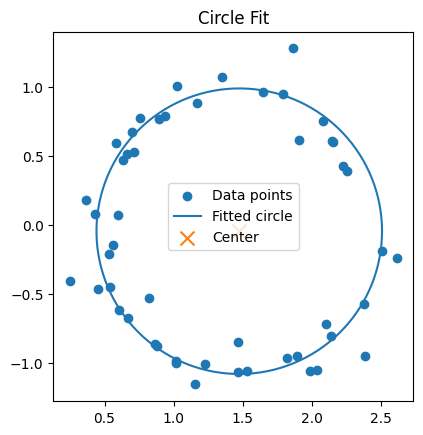

In [43]:
c_hat = c.value          # center (2,)
r_hat = r                # radius

# Generate circle
theta = np.linspace(0, 2*np.pi, 400)
x_circle = c_hat[0] + r_hat * np.cos(theta)
y_circle = c_hat[1] + r_hat * np.sin(theta)

# Plot
plt.figure()
plt.scatter(U[0, :], U[1, :], label="Data points")
plt.plot(x_circle, y_circle, label="Fitted circle")
plt.scatter(c_hat[0], c_hat[1], marker='x', s=100, label="Center")

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Circle Fit")
plt.show()

### A8.26) Problems Involving a Polyhedron and a Point

a) Easy. This is minimizing the l2 norm (convex objective) with linear inequality constraints, a convex optimization problem.  
b) Easy. This is minimizing the l-inf norm (convex objective) with linear inequality constraints, also a convex optimization problem.  
c) Hard.   
d) Easy. We can solve $n$ convex optimization problems- for each element in the dimension we maximize the single linear term and take the largest feasible solution.  

### A9.10) True or False

a) false  
b) true  
c) false  
d) true  
e) false  
f) true  
g) false  

### A9.13) Newton's Method in Machine Learning Problems.  


(d) Due to the large problem size, it is generally not practical to form or store the Hessian, let
alone compute the Newton step

### A13.2) True or False- Flop Counts

a) False  
b) False  
c) True

### A13.3) Ridge Regression

We can generally reduce the problem to O(big dim x small dim^2). 

a) $mn^2$  
b) $m^2n$

### A17.6) Efficient solution of basic portfolio optimization problem

a) We flip to problem to minimize $(\lambda/2)w^T\Sigma w - \mu^Tw$. Forming the Lagrangian and setting the gradient equal to 0, we get $\Sigma w - \mu + \nu 1 = 0$. Forming the KKT system, we get 
$$ 	\begin{bmatrix}
   \Sigma & 1 \\
   1^T & 0
\end{bmatrix}

\begin{bmatrix}
   w\\
   \nu
\end{bmatrix}
 = 
 \begin{bmatrix}
   \mu\\
   1
\end{bmatrix}
$$

Naively, this takes $O(n^3) $ flops to solve.

b) Using the substitution $\Sigma = FQF^T + D$, we have $(1/2)w^TFQF^Tw + (1/2)w^TDw - \mu^Tw$. Substituting $y = F^Tw$, we seek to 


minimize $$(1/2) y^TQy + (1/2) w^TDw - \mu^Tw$$ 
subject to $$1^Tw = 1, F^Tw = y$$

Forming the Lagrangian $$\mathcal{L}(w, y, \nu, \lambda) = (1/2)y^TQy + (1/2)w^TDw+\mu^Tw + \nu(1^Tw-1) + \lambda(F^Tw - y)$$ Setting the gradient to 0, we form the KKT system
$$ 	\begin{bmatrix}
   D & 0 & 1 & F \\
   0 & Q & 0 & -I \\
   1 & 0 & 0 & 0 \\
   F^T & -I & 0 & 0
\end{bmatrix}

\begin{bmatrix}
   w\\
   y \\
   \nu \\
   \lambda
\end{bmatrix}
 = 
 \begin{bmatrix}
   \mu\\
   0 \\
   1 \\
   0
\end{bmatrix}
$$

Breaking this up into block matrices, we must solve
$$
(\begin{bmatrix}
Q & 0 & -I \\
0 & 0 & 0 \\
-I & 0 & 0
\end{bmatrix} 
- 
\begin{bmatrix}
0 \\
1^T \\
F^T
\end{bmatrix}
D^{-1}
\begin{bmatrix}
0 & 1 & F \\
\end{bmatrix})
\begin{bmatrix}
y \\
\nu \\
\lambda
\end{bmatrix}
= 
\begin{bmatrix}
0 \\
1 \\
1
\end{bmatrix}
-
\begin{bmatrix}
0 \\
1^T \\
F^T
\end{bmatrix}
D^{-1}
\mu
$$

While solving this is $O(k^3)$, forming the matrices actually dominates the overall computation with $O(nk^2)$ cost.

In [44]:
import time

np.random.seed(1)

n = 2500
k = 30

# Random factor loading
F = np.random.randn(n, k)

# Make Q positive definite
Q = np.random.randn(k, k)
Q = Q.T @ Q + 0.1*np.eye(k)

# Make D diagonal positive definite
d = np.random.rand(n) + 0.5
D = np.diag(d)

# Expected returns
mu = np.random.randn(n)

ones = np.ones(n)

In [45]:
start = time.time()

Sigma = F @ Q @ F.T + D

# KKT system
KKT = np.block([
    [Sigma, ones[:,None]],
    [ones[None,:], np.zeros((1,1))]
])

rhs = np.concatenate([mu, [1]])

sol = np.linalg.solve(KKT, rhs)
w_a = sol[:n]

end = time.time()
print("Method (a) time:", end - start)

Method (a) time: 0.8518359661102295


In [46]:
start = time.time()

Dinv = np.diag(1/d)
# Precompute terms
FDinv = F.T @ Dinv
FDinvF = FDinv @ F
FDinv1 = FDinv @ ones
FDinvmu = FDinv @ mu

oneDinv1 = ones @ Dinv @ ones
oneDinvF = ones @ Dinv @ F
oneDinvmu = ones @ Dinv @ mu

# Build reduced system
A11 = oneDinv1
A12 = oneDinvF
A21 = FDinv1
A22 = FDinvF + np.linalg.inv(Q)

A = np.block([
    [A11, A12],
    [A21[:,None], A22]
])

b = np.concatenate([
    [oneDinvmu - 1],
    FDinvmu
])

sol = np.linalg.solve(A, b)

nu = sol[0]
lam = sol[1:]

# Recover w
w_b = Dinv @ (mu - nu*ones - F @ lam)

end = time.time()
print("Method (b) time:", end - start)

Method (b) time: 0.16056275367736816


d) 
$$\lambda \Sigma w - \mu + \nu 1 = 0 $$
$$w = (1/\lambda) \Sigma^{-1}(\mu + \nu 1)$$
So we can see w is affine with respect to $1/\lambda$.
Naively computing M times results in cost $O(Mnk^2)$. However, by expressing $w(\lambda) = w_0 + (1/\lambda)w_1$, we can solve this in $O(Mn) $ time, so our overall complexity is $O(nk^2 + Mn)$